In [1]:
#load autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/lhome/ific/a/aamerio/data/github/GenSBI/src")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
sns.set_style("darkgrid")

In [4]:
data = np.random.normal(size=(1_000,10)) + np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
true_param = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [5]:
ndim = data.shape[1]
labels = [r"$\theta_{}$".format(i) for i in range(1, ndim + 1)]
labels

['$\\theta_1$',
 '$\\theta_2$',
 '$\\theta_3$',
 '$\\theta_4$',
 '$\\theta_5$',
 '$\\theta_6$',
 '$\\theta_7$',
 '$\\theta_8$',
 '$\\theta_9$',
 '$\\theta_10$']

In [6]:
from gensbi.utils.plotting import plot_marginals

In [7]:
data[:,:2]

array([[-0.70866305, -0.27529263],
       [ 0.97019291,  0.81859731],
       [-1.3795698 , -0.98474238],
       ...,
       [-0.7674804 ,  1.62614523],
       [-1.17757444,  0.48712468],
       [-0.61419079, -0.75423762]], shape=(1000, 2))

<Figure size 640x480 with 0 Axes>

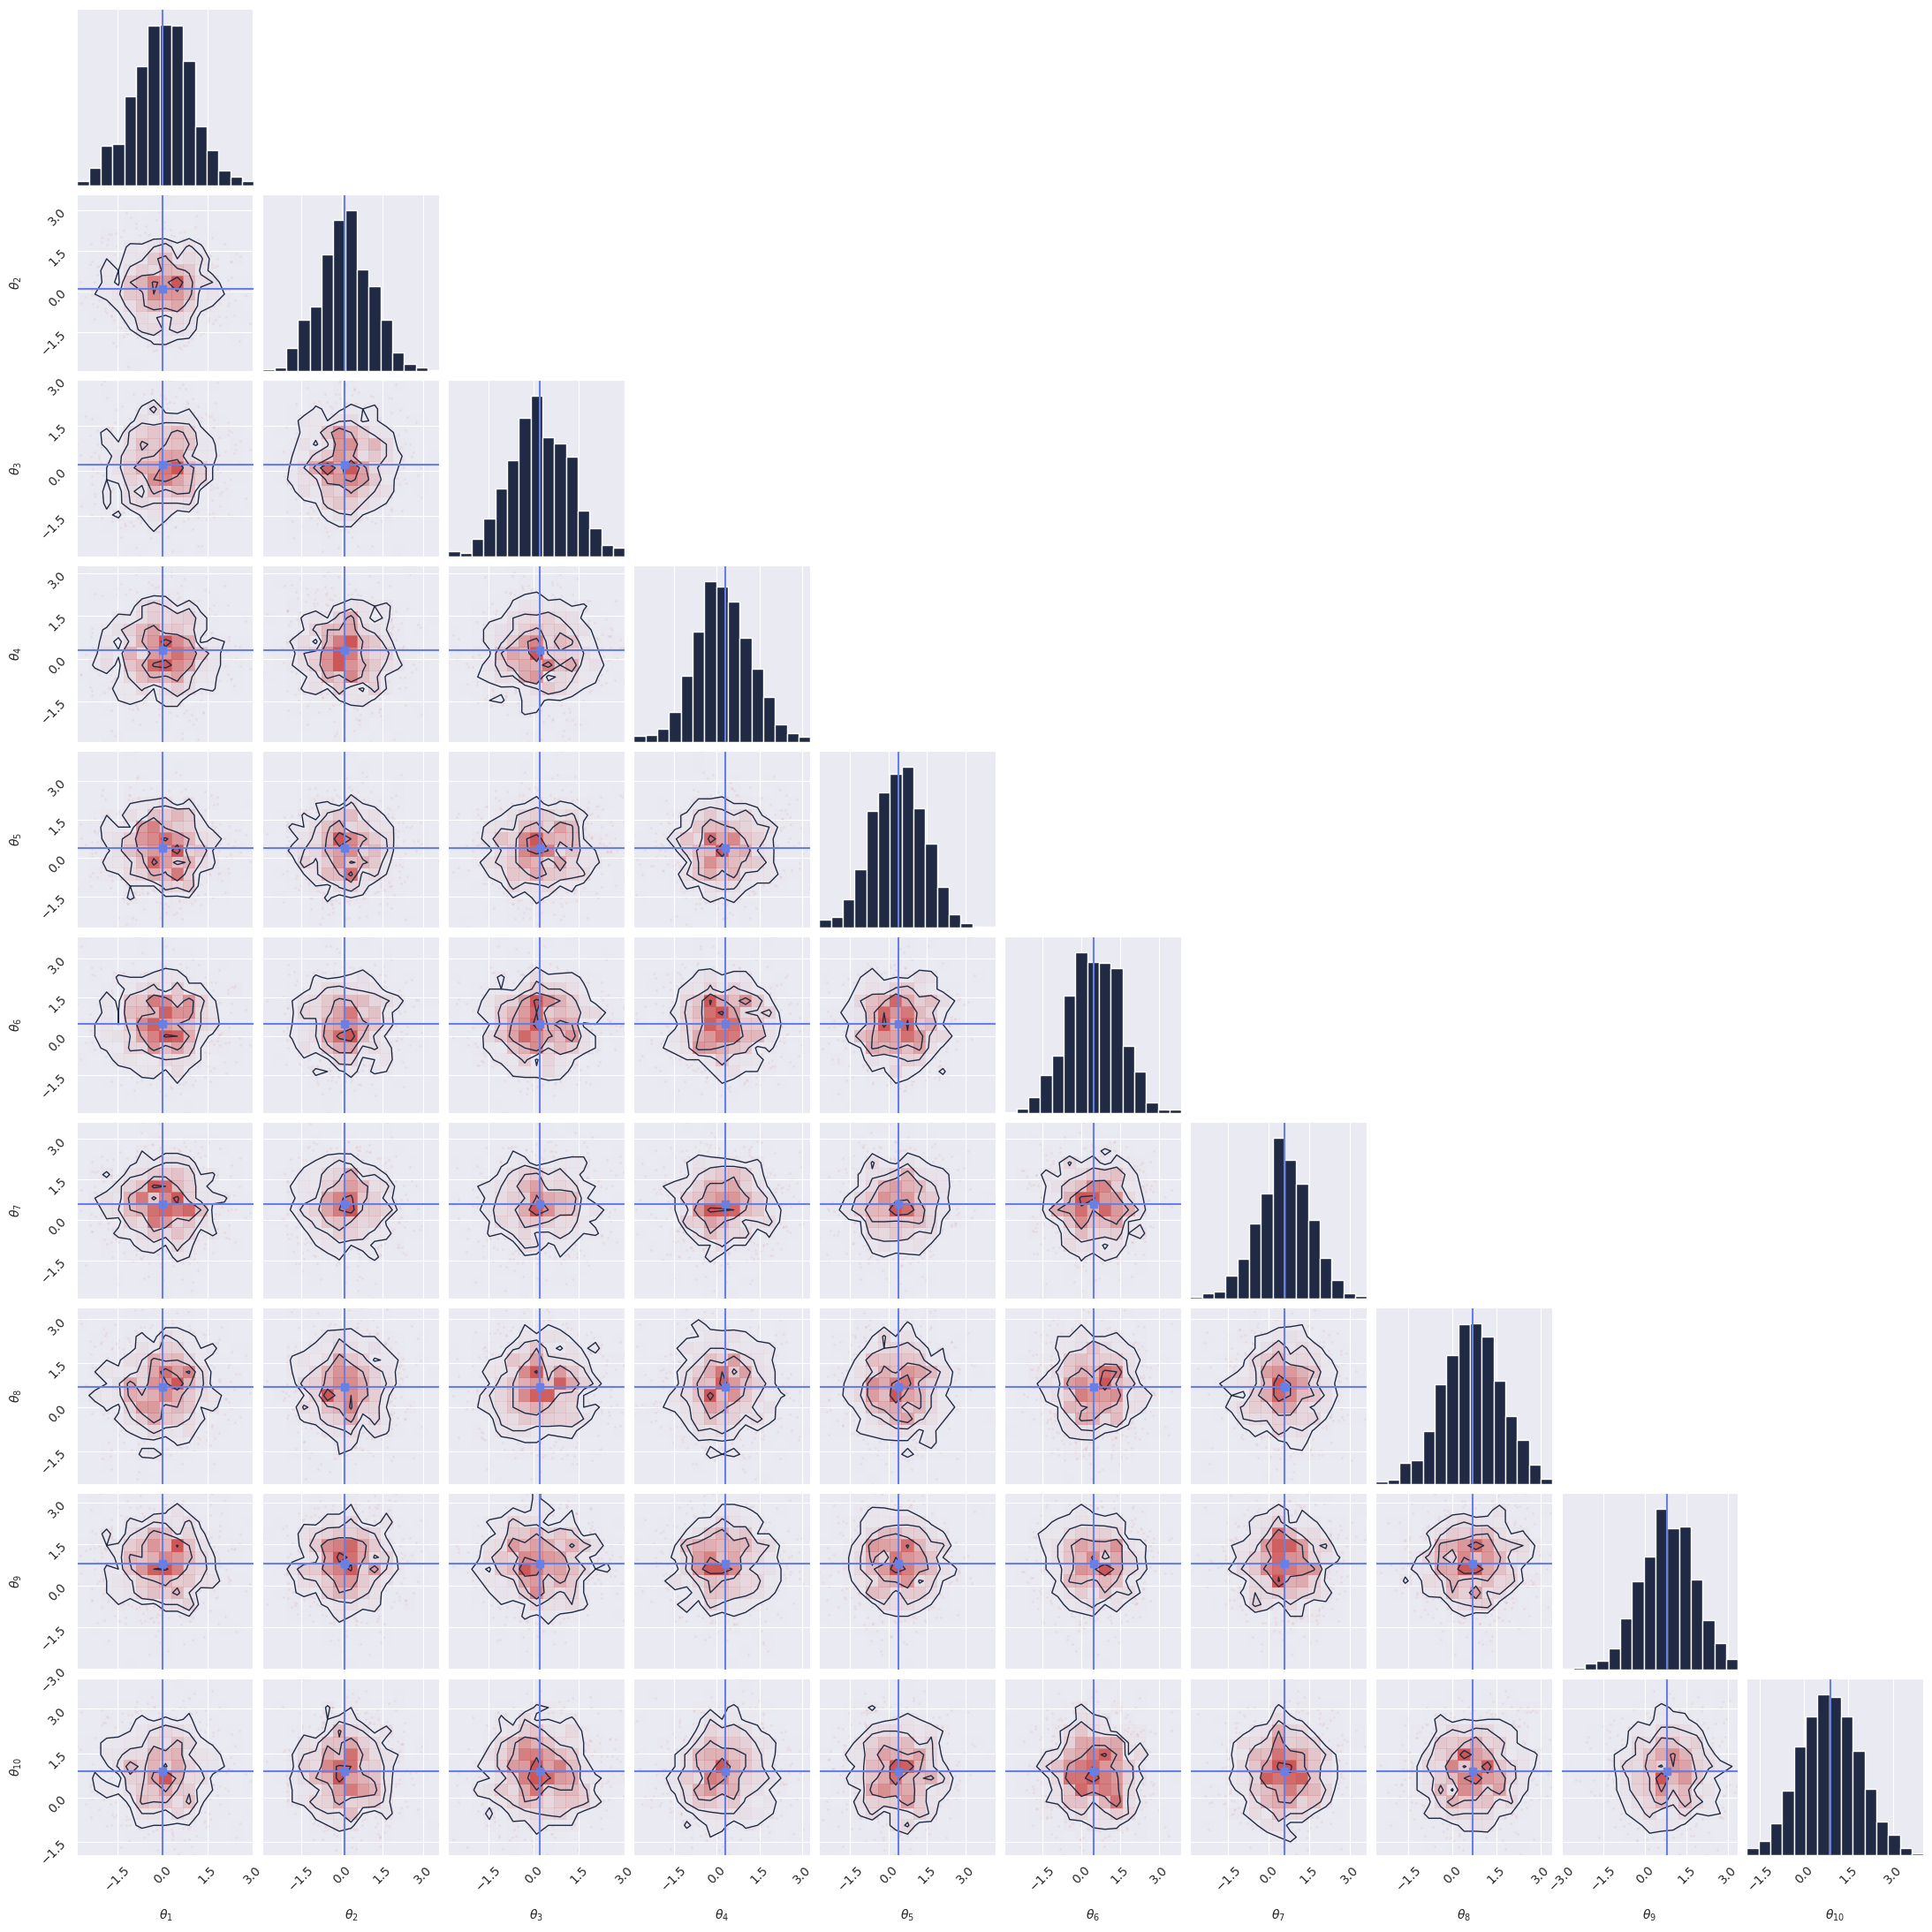

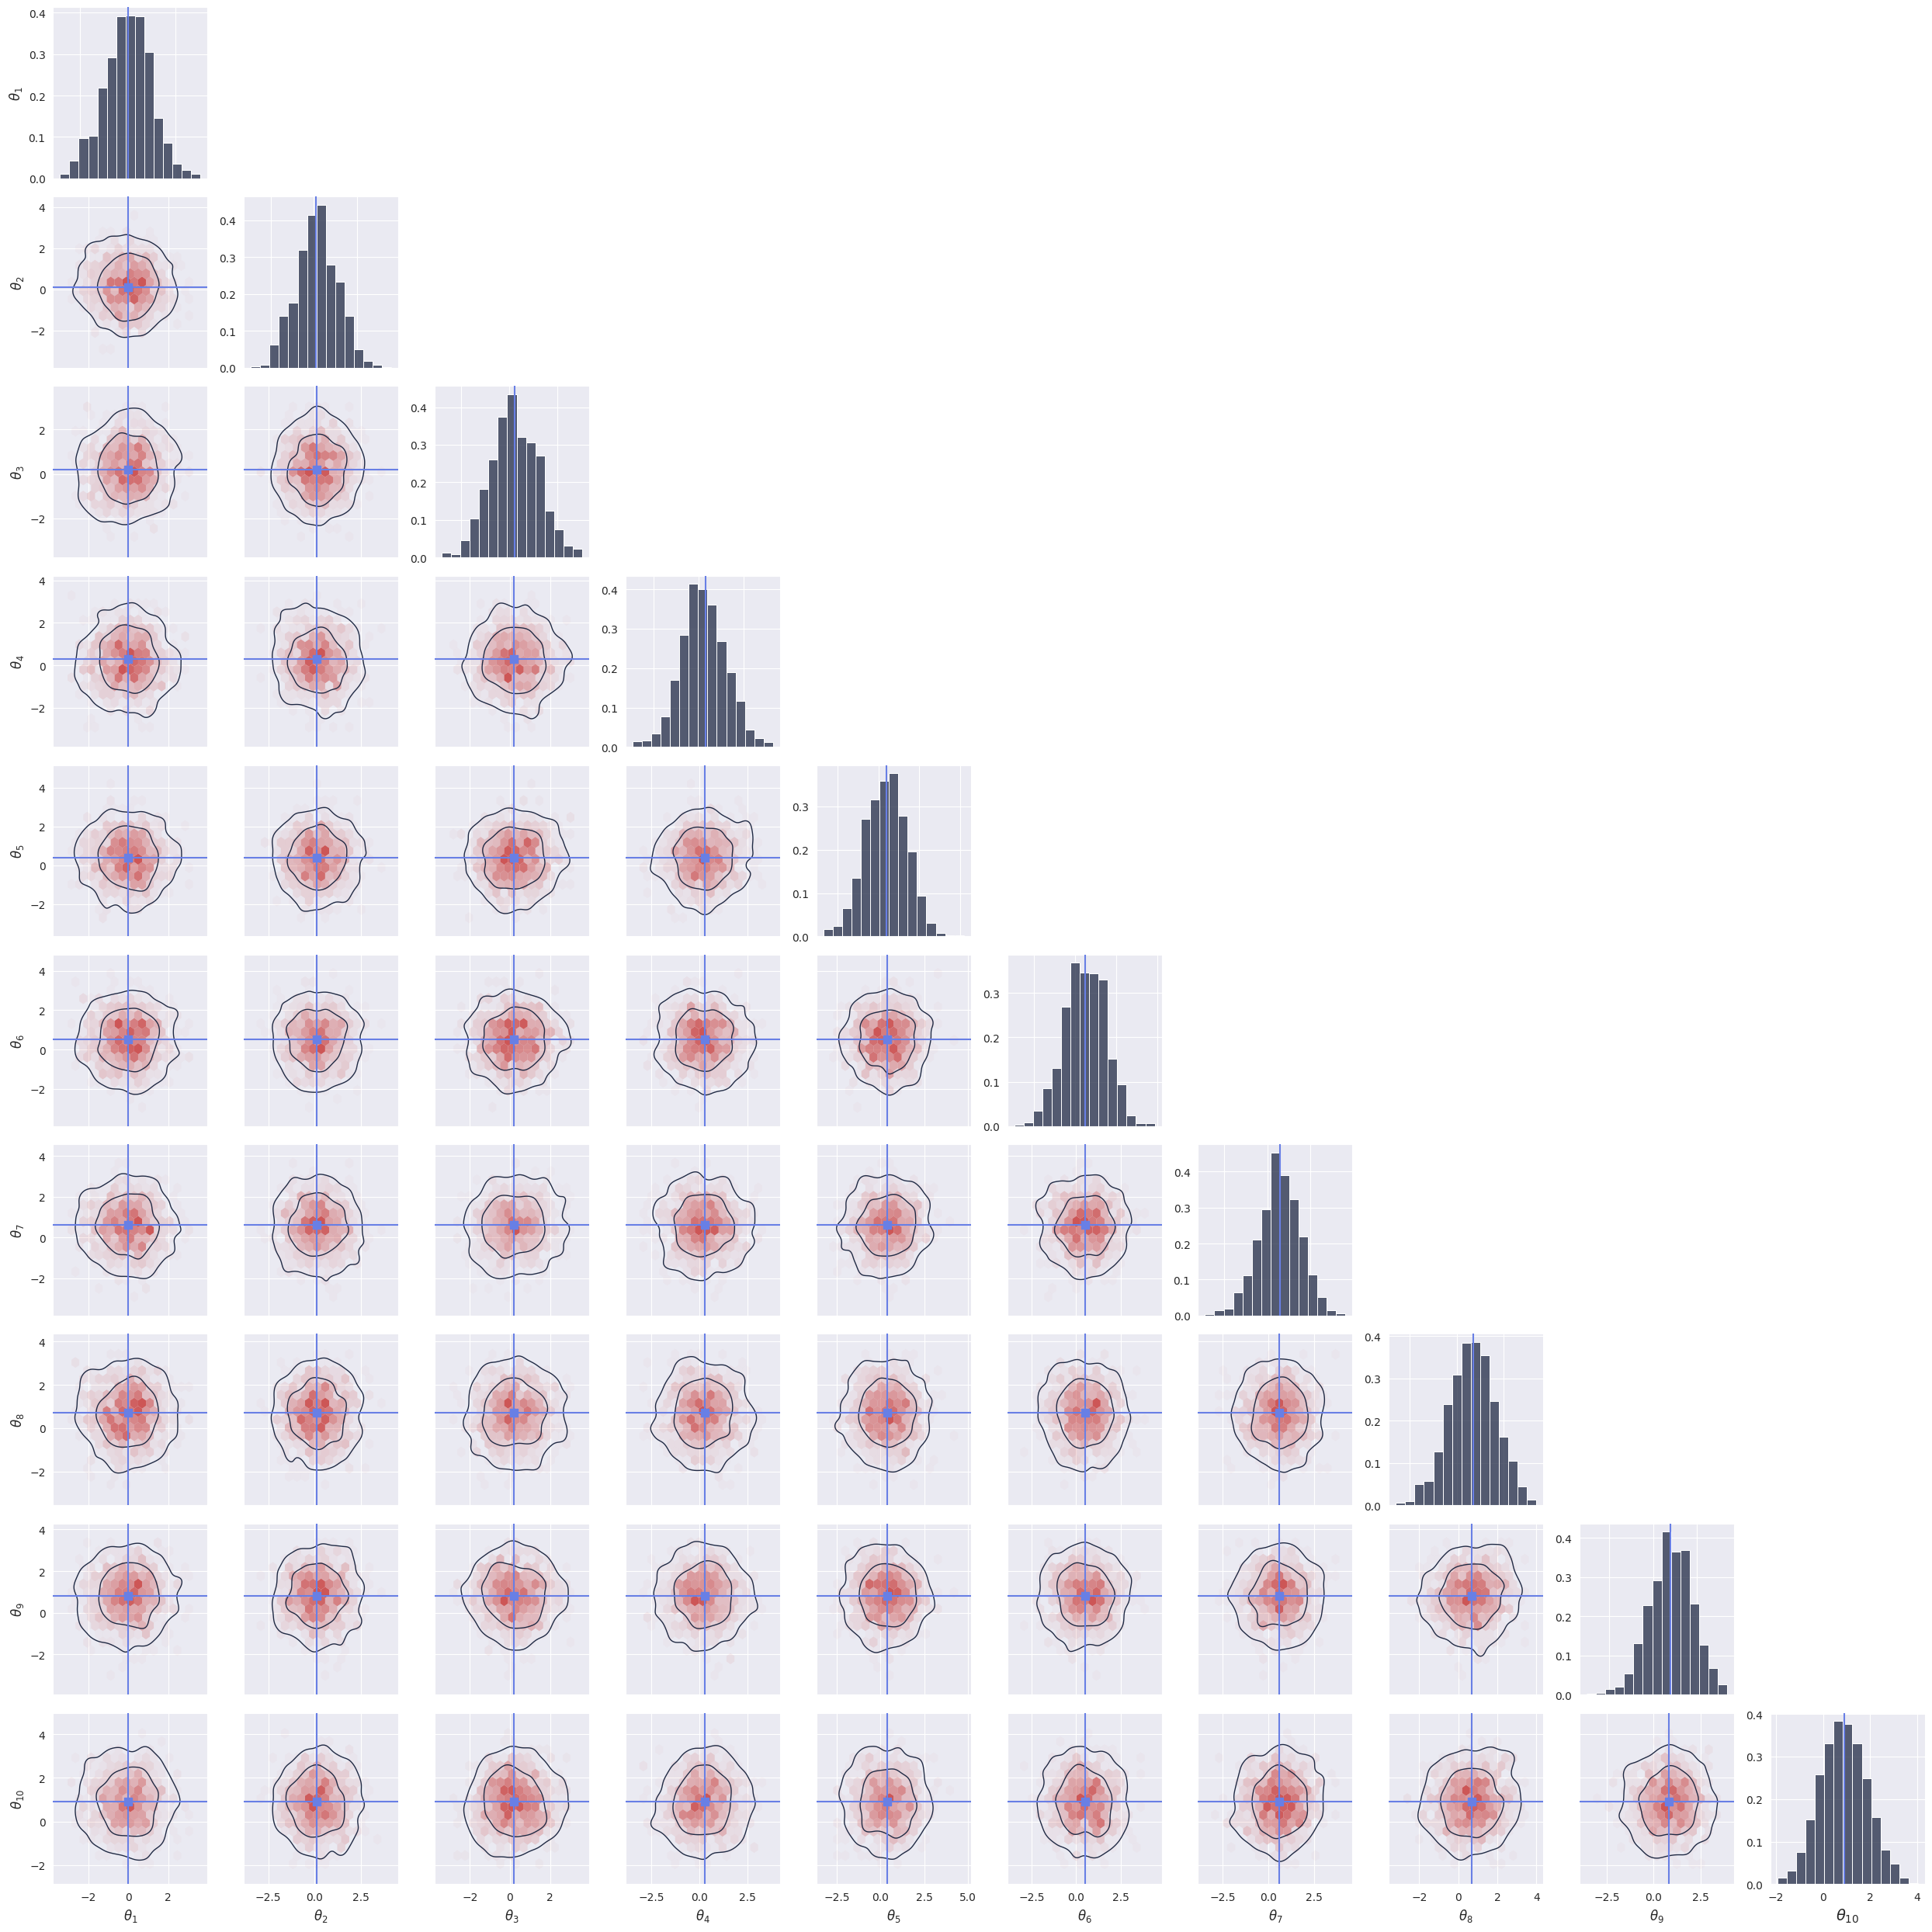

In [8]:
plot_marginals(data, true_param=true_param, backend="corner")
plt.show()

plot_marginals(data, true_param=true_param, backend="seaborn")
plt.show()

<Figure size 640x480 with 0 Axes>

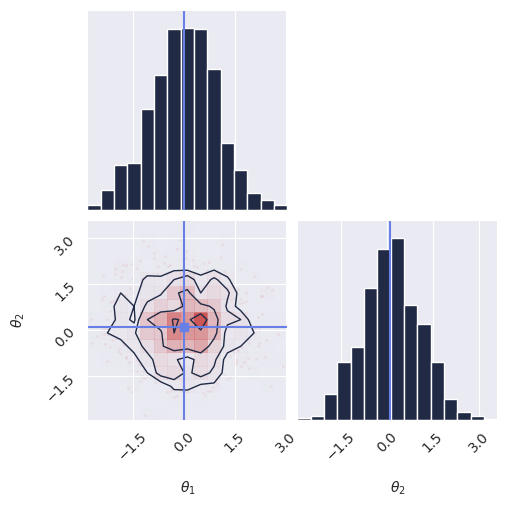

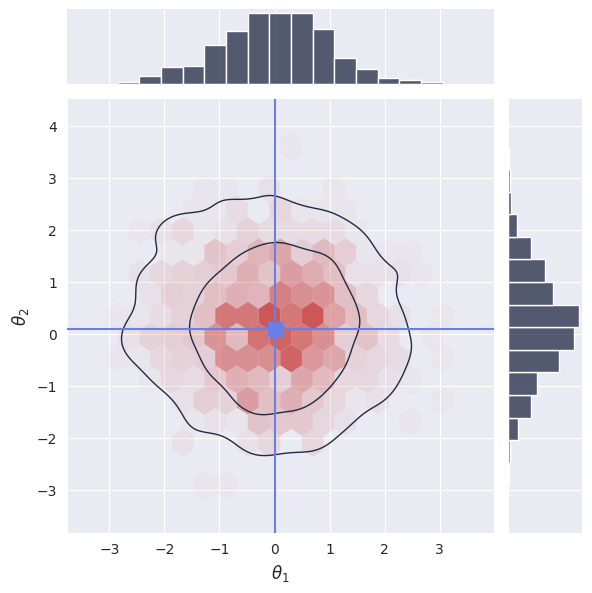

In [9]:
plot_marginals(data[:, :2], true_param=true_param[:2], backend="corner")
plt.show()

plot_marginals(data[:, :2], true_param=true_param[:2], backend="seaborn")
plt.show()

In [9]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
sns.set_style("darkgrid")
# transparent_cmap = LinearSegmentedColormap.from_list(
#     "transparent_blue", 
#     [(0, (0, 0, 1, 0)), (1, (0, 0, 0, 1))]  # RGBA: transparent blue to opaque dark blue
# )
# rgb = sns.light_palette("#CD5656", as_cmap=False, n_colors=2)
# rgb = np.array(rgb)
# convert an html color #CD5656 to an RGB tuple using seaborn
rgb_base = np.array(mcolors.to_rgb("#CD5656"))

colors = [(rgb_base[0], rgb_base[1], rgb_base[2], 0), # At data value 0, color is rgb_base with alpha 0
          (rgb_base[0], rgb_base[1], rgb_base[2], 1)] # At data value 1, color is rgb_base with alpha 1

transparent_cmap= LinearSegmentedColormap.from_list("transparent_red", colors, N=256)
# print("Method 2 (LinearSegmentedColormap) created.")

# # # get the viridis colormap
# # rgb = sns.color_palette("magma", n_colors=256)

# # Create an alpha gradient from 0 (transparent) to 1 (opaque)
# alpha = np.linspace(0, 1, 256)

# # Combine RGB and alpha to make RGBA
# rgba = np.concatenate([np.repeat(rgb[None,:],256,axis=0), alpha[:, None]], axis=1)

# # Create a new colormap
# transparent_cmap = ListedColormap(rgba)

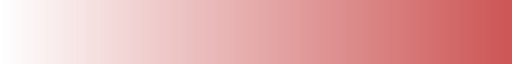

In [10]:
transparent_cmap

In [11]:
dataframe = pd.DataFrame(data, columns=[r"$A_1$", r"$B_2$", r"$C_3$", r"$D_4$"])

In [12]:
# # plot a jointplot with hex and histograms
# # g = sns.jointplot(data=data, x="x_0", y="x_1", kind="kde", fill=True)
# g = sns.jointplot(dataframe, x="A", y="B", kind="hex", height=6, gridsize=25, marginal_kws=dict(bins=25, fill=True, color="#202A44"),joint_kws=dict(cmap=transparent_cmap))
# # add custom labels for x0 and x1 with latex
# g.ax_joint.set_xlabel(r"$\theta_0$", fontsize=14)
# g.ax_joint.set_ylabel(r"$\theta_1$", fontsize=14)
# g.plot_joint(sns.kdeplot, color="#202A44", zorder=3, levels=[0.68, 0.956, 0.997], alpha=1, linewidths=1)
# # g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=True)
# # plt.savefig("/lhome/ific/a/aamerio/github/GenSBI/examples/sbi-benchmarks/two_moons/two_moons_posterior.png", dpi=300, bbox_inches='tight')
# plt.show()

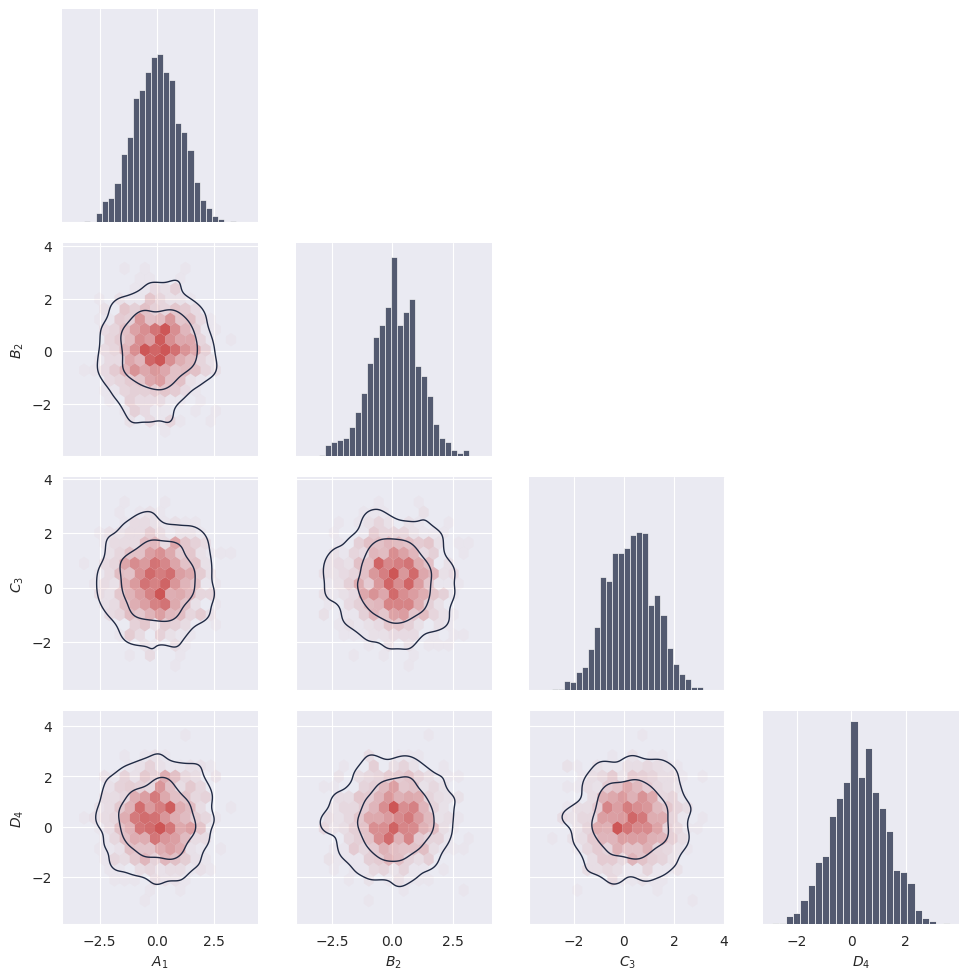

In [13]:
g = sns.PairGrid(dataframe, corner=True)
g.map_lower(plt.hexbin, gridsize=15, cmap=transparent_cmap, color=colors[0])
g.map_lower(sns.kdeplot, levels=np.sort(1-np.array([0.68, 0.95])), color="#202A44", zorder=3, alpha=1, linewidths=1)
g.map_diag(sns.histplot, bins=25, color="#202A44", fill=True)
# g.map_offdiag(sns.scatterplot)

In [14]:
def plot_marginals(data, plot_levels=True, labels=None, gridsize=15, hexbin_kwargs={}, histplot_kwargs={}):
    if labels is None:
        labels = [r"$\theta_{}$".format(i) for i in range(1, data.shape[1] + 1)]
    dataframe = pd.DataFrame(data, columns=labels)

    g = sns.PairGrid(dataframe, corner=True)
    cmap = hexbin_kwargs.pop('cmap', transparent_cmap)
    color = hexbin_kwargs.pop('color', [0,0,0,0])  # Default to transparent color

    g.map_lower(plt.hexbin, gridsize=gridsize, cmap=cmap, color=color, **hexbin_kwargs)
    if plot_levels:
        g.map_lower(sns.kdeplot, levels=np.sort(1-np.array([0.6827, 0.9545])), color="#202A44", zorder=3, alpha=1, linewidths=1, **hexbin_kwargs)

    bins = histplot_kwargs.pop('bins', gridsize)
    fill = histplot_kwargs.pop('fill', True)
    color = histplot_kwargs.pop('color', "#202A44")
    g.map_diag(sns.histplot, bins=bins, color=color, fill=fill, **histplot_kwargs)
    return g

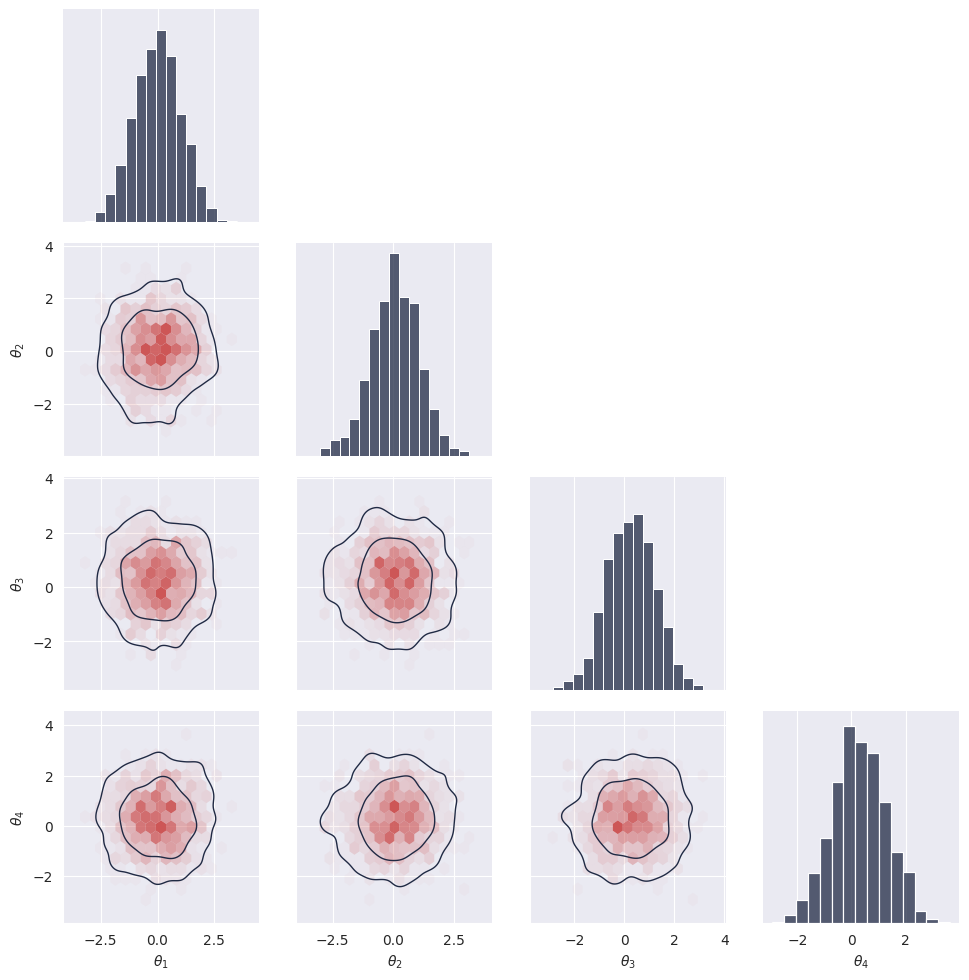

In [15]:
plot_marginals(data)
plt.show()

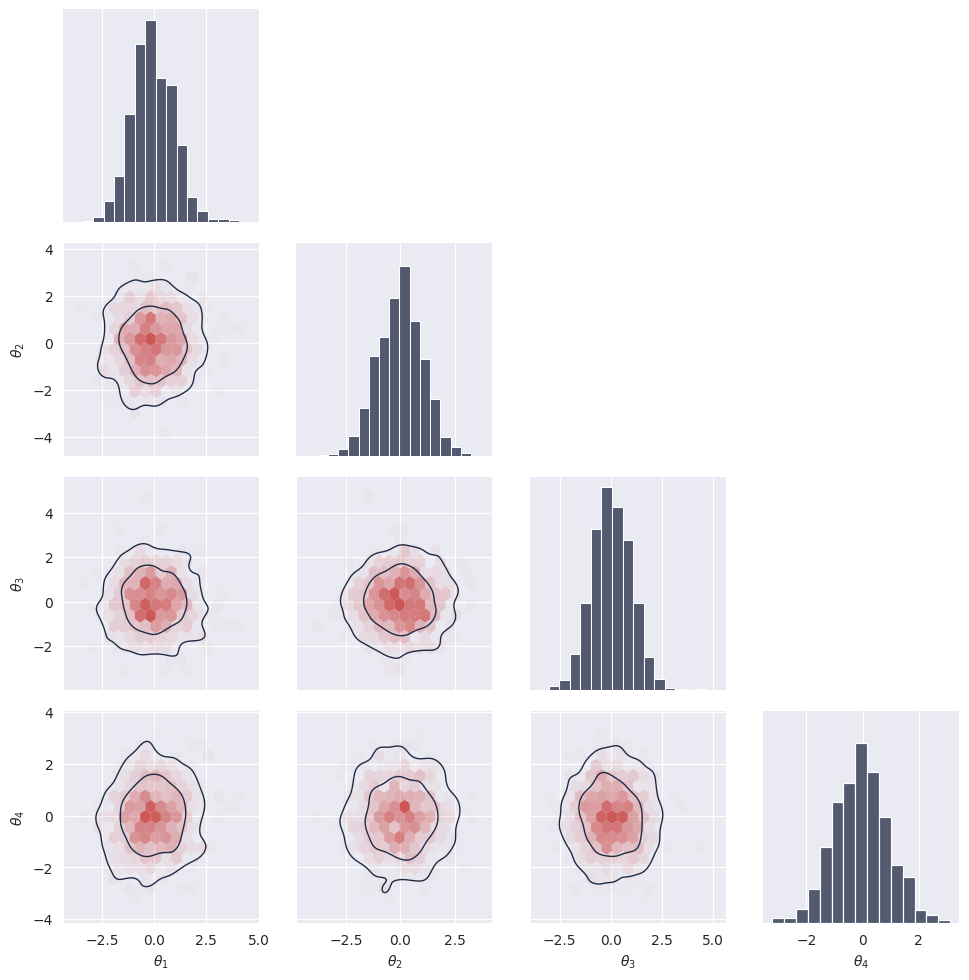

In [16]:
base_color = "#CD5656"  # Base color for the hexbin and kdeplot
hist_color = "#202A44"  # Color for the histograms 

In [17]:
def plot_marginals_2d(data, plot_levels=True, labels=None, gridsize=15, hexbin_kwargs={}, histplot_kwargs={}):
    if labels is None:
        labels = [r"$\theta_{}$".format(i) for i in range(1, data.shape[1] + 1)]
    dataframe = pd.DataFrame(data, columns=labels)

    cmap = hexbin_kwargs.pop('cmap', transparent_cmap)
    color = hexbin_kwargs.pop('color', [0,0,0,0])  # Default to transparent color
    gridsize = hexbin_kwargs.pop('gridsize', gridsize)


    g = sns.jointplot(data=dataframe, x=labels[0], y=labels[1], kind="hex", height=6, gridsize=gridsize, marginal_kws=dict(bins=gridsize, fill=True, color=hist_color),joint_kws=dict(cmap=cmap, color=color, gridsize=gridsize))

    if plot_levels:
        levels = np.sort(1-np.array([0.6827, 0.9545]))
        g.plot_joint(sns.kdeplot, color=hist_color, zorder=3, levels=levels, alpha=1, linewidths=1)
    return g


In [18]:
def setup_figure_pars(pars_dict={}):
    # update plotting parameters from a dictionary
    fig_width = 8  # width in inches
    fig_height = 8  # height in inches
    fig_size =  pars_dict.get('fig_size', [fig_width, fig_height])
    params = {'axes.labelsize': 18, #unit
            #   'axes.titlesize': 22,  #title
              'font.size': 9,
              'legend.fontsize': 14,
            #   'xtick.labelsize':12, #ticks
            #   'ytick.labelsize':12,
              #'text.usetex': True,
            #   'figure.figsize': fig_size,
            #   'xtick.major.size' : 6,
            #   'ytick.major.size' : 6,
            #   'xtick.minor.size' : 3,
            #   'ytick.minor.size' : 3,
            }
    for key in params.keys():
        if key in pars_dict:
            params[key] = pars_dict[key]
    plt.rcParams.update(params)
    return 0

setup_figure_pars()

0

In [19]:
sns.set_style("darkgrid")

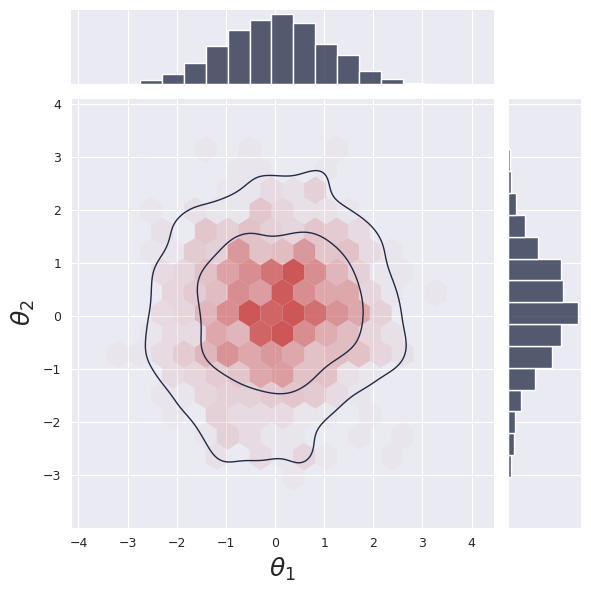

In [20]:
plot_marginals_2d(data)
plt.show()

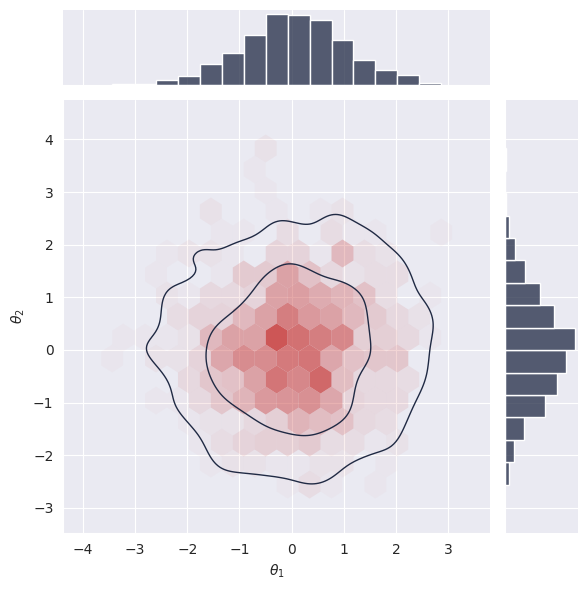

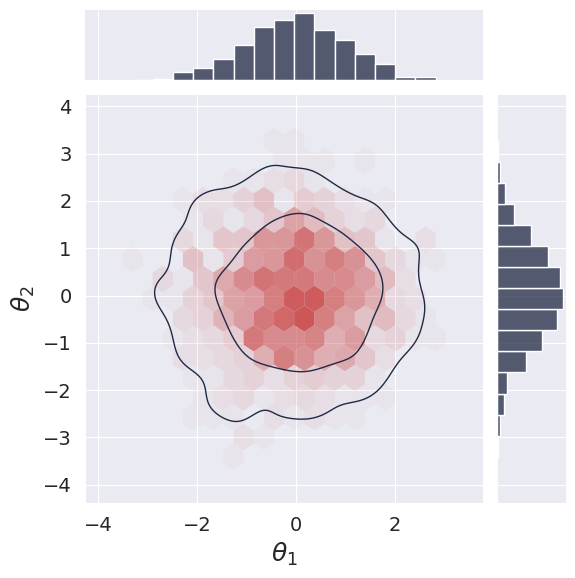